<a href="https://colab.research.google.com/github/Dhawaldwivedi/Python-for-Data-analytics/blob/main/Myntra_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python assignment**

- Load the dataset into your notebook and import necessary libraries
- Perform basic analysis of dataset like shape and info() , describe etc
- Check for the Null values and perform necessary cleaning
- Fetch the product id from the product link
- Find the discount and discount percentage
- Plot Price vs Rating and Discount vs Rating
- Find top 10 brands by product count
- Find top 10 brands by average discount
- Find the top 10 most reviewed products
- Find products with highest discount



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Myntra dataset.csv')
df.head()

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,product_link
0,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,wallets/lino-perros/lino-perros-women-peach-co...
1,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,flip-flops/mast--harbour/mast--harbour-men-nav...
2,Printed A-line Kurta,Biba,4.3,66,1999,1599,kurtas/biba/biba-women-off-white--black-printe...
3,Girls Floral Printed T-shirt,Anthrilo,0.0,0,599,539,tshirts/anthrilo/anthrilo-girls-white-floral-p...
4,Women Printed Kurta with Skirt,FASHION DWAR,0.0,0,2899,2899,kurta-sets/fashion-dwar/fashion-dwar-women-mul...


In [4]:
df.shape

(168029, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168029 entries, 0 to 168028
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   product_name      168029 non-null  object 
 1   brand_name        168029 non-null  object 
 2   rating            168029 non-null  float64
 3   rating_count      168029 non-null  int64  
 4   marked_price      168029 non-null  int64  
 5   discounted_price  168029 non-null  int64  
 6   product_link      168029 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 9.0+ MB


In [6]:
df.isnull().sum()

,0
product_name,0
brand_name,0
rating,0
rating_count,0
marked_price,0
discounted_price,0
product_link,0


In [7]:
df['product_name']= df['product_name'].str.strip().str.title()
df['brand_name']= df['brand_name'].str.strip().str.title()
df.head()

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,product_link
0,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,wallets/lino-perros/lino-perros-women-peach-co...
1,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,flip-flops/mast--harbour/mast--harbour-men-nav...
2,Printed A-Line Kurta,Biba,4.3,66,1999,1599,kurtas/biba/biba-women-off-white--black-printe...
3,Girls Floral Printed T-Shirt,Anthrilo,0.0,0,599,539,tshirts/anthrilo/anthrilo-girls-white-floral-p...
4,Women Printed Kurta With Skirt,Fashion Dwar,0.0,0,2899,2899,kurta-sets/fashion-dwar/fashion-dwar-women-mul...


In [8]:
df['product_id'] = df['product_link'].str.split('/').str[-2]
df.head()

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,product_link,product_id
0,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,wallets/lino-perros/lino-perros-women-peach-co...,18070682
1,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,flip-flops/mast--harbour/mast--harbour-men-nav...,12548958
2,Printed A-Line Kurta,Biba,4.3,66,1999,1599,kurtas/biba/biba-women-off-white--black-printe...,13446092
3,Girls Floral Printed T-Shirt,Anthrilo,0.0,0,599,539,tshirts/anthrilo/anthrilo-girls-white-floral-p...,18017006
4,Women Printed Kurta With Skirt,Fashion Dwar,0.0,0,2899,2899,kurta-sets/fashion-dwar/fashion-dwar-women-mul...,18015232


In [9]:
df['category'] = df['product_link'].str.split('/').str[0]
df.head()

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,product_link,product_id,category
0,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,wallets/lino-perros/lino-perros-women-peach-co...,18070682,wallets
1,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,flip-flops/mast--harbour/mast--harbour-men-nav...,12548958,flip-flops
2,Printed A-Line Kurta,Biba,4.3,66,1999,1599,kurtas/biba/biba-women-off-white--black-printe...,13446092,kurtas
3,Girls Floral Printed T-Shirt,Anthrilo,0.0,0,599,539,tshirts/anthrilo/anthrilo-girls-white-floral-p...,18017006,tshirts
4,Women Printed Kurta With Skirt,Fashion Dwar,0.0,0,2899,2899,kurta-sets/fashion-dwar/fashion-dwar-women-mul...,18015232,kurta-sets


In [10]:
df['total_revenue'] = df['rating_count']*df['discounted_price']
df.head()

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,product_link,product_id,category,total_revenue
0,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,wallets/lino-perros/lino-perros-women-peach-co...,18070682,wallets,0
1,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,flip-flops/mast--harbour/mast--harbour-men-nav...,12548958,flip-flops,44384
2,Printed A-Line Kurta,Biba,4.3,66,1999,1599,kurtas/biba/biba-women-off-white--black-printe...,13446092,kurtas,105534
3,Girls Floral Printed T-Shirt,Anthrilo,0.0,0,599,539,tshirts/anthrilo/anthrilo-girls-white-floral-p...,18017006,tshirts,0
4,Women Printed Kurta With Skirt,Fashion Dwar,0.0,0,2899,2899,kurta-sets/fashion-dwar/fashion-dwar-women-mul...,18015232,kurta-sets,0


In [11]:
# discount
df['discount'] = df['marked_price'] - df['discounted_price']
df.head()

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,product_link,product_id,category,total_revenue,discount
0,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,wallets/lino-perros/lino-perros-women-peach-co...,18070682,wallets,0,467
1,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,flip-flops/mast--harbour/mast--harbour-men-nav...,12548958,flip-flops,44384,715
2,Printed A-Line Kurta,Biba,4.3,66,1999,1599,kurtas/biba/biba-women-off-white--black-printe...,13446092,kurtas,105534,400
3,Girls Floral Printed T-Shirt,Anthrilo,0.0,0,599,539,tshirts/anthrilo/anthrilo-girls-white-floral-p...,18017006,tshirts,0,60
4,Women Printed Kurta With Skirt,Fashion Dwar,0.0,0,2899,2899,kurta-sets/fashion-dwar/fashion-dwar-women-mul...,18015232,kurta-sets,0,0


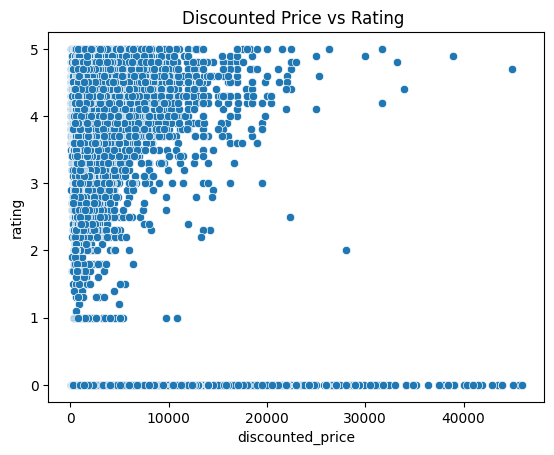

In [12]:
# Discounted Price vs Rating
sns.scatterplot(data = df ,x= 'discounted_price' , y = 'rating' )
plt.title("Discounted Price vs Rating ")
plt.show()

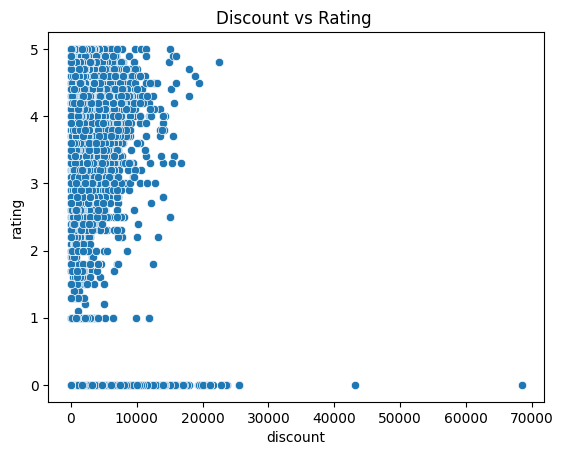

In [15]:
sns.scatterplot(data = df ,x= 'discount' , y = 'rating' )
plt.title("Discount vs Rating ")
plt.show()

In [19]:
# Find top 10 brands by product count
top_brands = df['brand_name'].value_counts().head(10)
top_brands


,count
brand_name,
Roadster,4982
Mast & Harbour,2640
Dressberry,2330
H&M,2188
Max,2045
Anouk,1962
Hrx By Hrithik Roshan,1922
Here&Now,1816
Puma,1805


In [21]:
# Find top 10 brands by average discount
top_avg_dis = df.groupby('brand_name')['discount'].mean().sort_values(ascending=False).head(10)
top_avg_dis

,discount
brand_name,
Swatika,22500.000000
Earnshaw,20201.346154
Bottega Veneta,17245.000000
Morkanth Jewellery,14000.000000
Swiss Military By Chrono,12375.000000
White Fire,12277.657143
Nakkashi,12232.000000
Justanned,12044.450000
National Geographic,12000.000000


In [23]:
# Find the top 10 most reviewed products
top_reviewed = df.sort_values(by='rating_count',ascending= False).head(10)
top_reviewed[['product_name','brand_name','rating_count']]

,product_name,brand_name,rating_count
33432,Unisex Skin Care Gift Set,Biotique,55900
59424,Kajal & Bold Liner Set,Maybelline,54600
128773,Unisex Skin Care Gift Set,Biotique,51000
128808,Unisex Skin Care Gift Set,Biotique,51000
104447,Printed Cotton Pure Cotton T-Shirt,Hrx By Hrithik Roshan,49300
108846,Skin Care Gift Set,Biotique,39100
75597,Toner-Cream-Serum-Night Cream,Biotique,38600
75647,Toner-Cream-Serum-Night Cream,Biotique,38600
160063,Set Of Foundation & Eyeliner,Maybelline,37000
83734,Set Of Eyeliner & Mascara,Maybelline,36200


In [24]:
# Find products with highest discount
top_discount = df.sort_values(by='discount',ascending= False).head(10)
top_discount[['product_name','brand_name','discount']]


,product_name,brand_name,discount
27039,Lord Krishna Showpiece,Ecraftindia,68400
56197,Durga Maa On Lion Showpiece,Ecraftindia,43200
117809,Men Stainless Steel Straps Multi Function Auto...,Earnshaw,25580
117817,Men Stainless Steel Straps Multi Function Auto...,Earnshaw,25580
116473,Men Stainless Steel Straps Multi Function Auto...,Earnshaw,25580
18316,Textured 360-Degree Rotation Hard-Sided Trolle...,Safari,23758
25265,Gold-Plated Stone-Studded Jewellery Set,Silvermerc Designs,23600
24736,Gold Plated Jewellery Set,Silvermerc Designs,23200
15422,Gold Plated Jewellery Set,Silvermerc Designs,23200
116276,Men Leather Straps Multi Function Automatic Mo...,Earnshaw,22780
